# 데이터 전처리
올바른 결과 도출을 위해서는 데이터를 사용하기 전에 데이터 전처리 과정을 거쳐야한다.
해당 챕터에서는 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배운다.


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
import numpy as np

np.column_stack(([1,2,3], [4,5,6])) #이 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다.

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
fish_data = np.column_stack((fish_length, fish_weight)) #데이터 생성
print(fish_data[:5]) #확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


넘파이의 column_stack()함수는 전달받은 리스트를 일렬로 세운다음 차례대로 나란히 연결함

np.ones() 와 np.zeros() 함수는 각각 원하는 개수의 1, 0으로 채운 배열을 만들어준다.

np.concatenate() 함수는 넘파이 배열들을 첫 번째 차원에 따라 배열을 연결시켜준다.


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


앞서 사용한 데이터와 같은 데이터를 준비하였다(이 과정에서는 넘파이 함수를 사용한 것이 포인트다)

이제 훈련 세트와 테스트 세트를 나눌 차례다.
# 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


사용법은 아주 간단하다. 나누고 싶은 리스트나 배열을 원하는 만큼 전달하면 된다. fish_data와 fish_target 2개의 배열을 전달했으므로 2개씩 나뉘어 총 4개의 배열이 반환된다. 

차례대로 처음 2개는 입력데이터, 나머지 2개는 타깃 데이터이다. 

train_test_split()함수에는 친절하게도 random_state 매개변수로 자체적으로 랜덤 시드를 지정할 수 있다.

또한 이 함수는 기본적으로 25%를 테스트 세트로 때어낸다. shape 속성으로 확인해보니 훈련데이터와 테스트 데이터를 각각 36개와 13개로 나누었으며, 입력데이터는 2차원 배열이고, 타깃 데이터는 1차원 데이터다.

In [10]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


테스트 데이터를 출력해보니 잘 섞인 것 같지만 두 생선 데이터의 비율은 2.5:1이나 이 테스트 데이터의 비율은 3.3:1로 약간의 샘플링 편향이 나타났음을 알 수 있다.

이런 문제점을 간단히 해결할 방법이 있다. 

train_test_split() 함수의 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. 

이 방법은 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용하다.

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


이제 테스트 세트의 비율이 꽤 비슷하게 맞추어졌다.

이제 문제의 도미 데이터를 확인해 볼 차례다

# 수상한 도미 한 마리
앞에서 준비한 데이터로 k-최근접 이웃을 훈련해보자.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

완벽한 결과다. 

이 모델에 다른 종류의 도미 데이터를 넣고 결과를 확인해보자. 

In [13]:
print(kn.predict([[25, 150]]))

[0.]


하자가 생겼다. 분명 도미 데이터지만 모델은 빙어라고 예측을 한 것이다. 

문제점을 확인해기 위해 산점도를 그려 확인해보자.

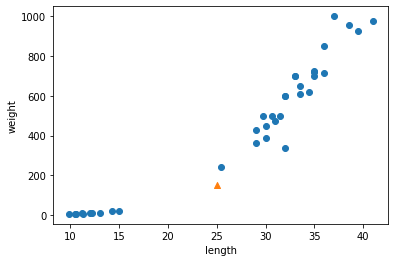

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

이상하다. 분명 다른 도미 데이터에 더 가까운것 닽은데 왜 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한걸까?

**k-최근접 이웃**은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다. 이 샘플의 주변 샘플을 알아보자.


**KNeighborsClassifier** 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아 주는 **kneighbors()** 메서드를 제공한다. 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다.

여기서는 이웃 개수의 기본값이 5이므로 5개의 이웃이 반환된다.

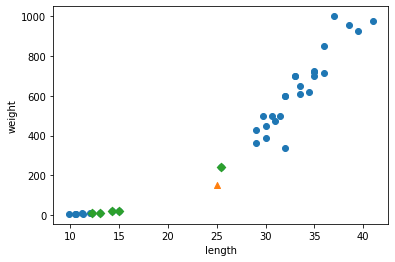

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[25.4 15.  14.3 13.  12.2]] [[242.   19.9  19.7  12.2  12.2]]


In [23]:
distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

print(distances, train_input[indexes,0], train_input[indexes,1])

위 산점도에서는 삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시되었다. 예측 결과와 마찬가지로 가장 가까운 이웃에 도미가 하나밖에 포함되지 않았다. 

**거리 데이터를 확인해보니 도미와 나머지 4개의 빙어들의 거리가 92보다 몇 배는 되어보이지만 실제로는 130밖에 안되는것이 수상하다.**

**아하 드디어 문제점을 발견하였다. x축과 y축의 범위를 보면 비율이 맞지 않다는 것을 알 수 있다**.

그렇다면 두 축의 비율을 맞춘 상태에서 다시 한 번 산점도를 그려보자

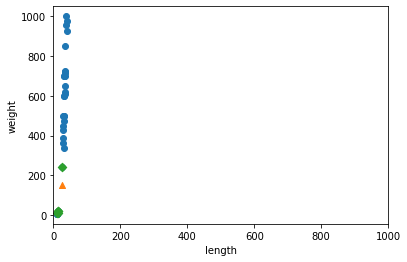

In [24]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim(0, 1000)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

산점도가 거의 일직선으로 나타나는 것을 확인할 수 있었다. 두 축의 범위를 동일하게 맞추니 모든 데이터가 수직으로 늘어선 형태가 되었다. 이런 상태에서는 x값이 거의 영향을 미치지 못한다는 것을 의미한다.

### 이러한 현상을 **두 특성의 스케일(scale)이 다르다**고도 말한다. 

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 특히 거리 기반 알고리즘의 경우에 말이다.

이런 알고리즘들은 **데이터 전처리**를 통해 특성값들을 일정한 기준으로 맞추어 주어야 한다.

#표준점수(표준화)
가장 널리 사용하는 거리 전처리 방법 중 하나는 **표준점수(standard score)**이다.(혹은 z점수라고도 부른다)

**표준점수는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다**. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

계산하는 방법은 간단하다. 평균을 빼고 표준편차를 나누어 주면 된다.

In [25]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


train_input은 (36,2)크기의 배열이다. **특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 한다.**

 이를 위해 axis = 0 으로 지정했다. 이렇게 하면 행을 따라 각 열의 통계 값을 계산한다.(반대로 axis=1로 지정하면 열을 따라 각 행의 통계값을 계산함)
 

이제 표준 점수로 변환하고, 이를 통해 다시 산점도를 그려보자. **(반드시 샘플도 표준화하는 과정을 잊으면 안된다!)**

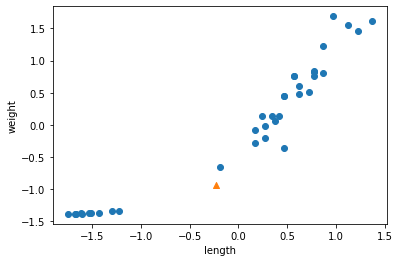

In [30]:
train_scaled = (train_input - mean) / std #데이터 표준화
sample = ([25, 150] - mean) /std #샘플 표준화

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(sample[0], sample[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

이 그래프는 앞선 산점도와 거의 동일하다. 가장 크게 달라진 점은 두 축의 범위가 -1.5 ~ 1.5 사이로 바뀌었다는 것이다. 

이제 모든 준비는 끝났다. 다시 k-최근점 이웃 모델을 훈련해보자.

In [27]:
kn.fit(train_scaled, train_target) #학습

test_scaled = (test_input - mean) / std #테스트 데이터 역시 표준화

kn.score(test_scaled, test_target)

1.0

In [29]:
print(kn.predict([sample]))

[1.]


드디어 성공이다. 확실히 길이가 25cm 이고 무게가 150g인 생선은 도미일 것이다.

마지막으로 kneighbors() 함수로 이 샘플의 k-최근접 이웃을 구한 다음 산점도로 그려서 확인해보자.

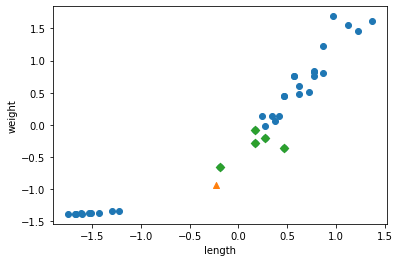

In [31]:
dis, idx = kn.kneighbors([sample])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(sample[0], sample[1], marker='^')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

완벽하다! 새로운 샘플에 대한 최근접 이웃들은 모두 도미다!!

위 과정들을 통해 특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델을 만들었다,